In [42]:
import pandas as pd
import numpy as np

In [43]:
# Load the data
data = pd.read_csv('/Users/ganesh/Documents/GitHub/djangoProject1/djangoProject1/Datasets/BigFive.csv', sep='\t')

In [44]:
# remove missing values from dataset data
data = data.dropna()

In [45]:
#select columns 1 to 51
df = data.iloc[:, 0:50]


In [46]:
# positive questions adding to the trait.
pos_questions = [ 
    'EXT1','EXT3','EXT5','EXT7','EXT9',                       # 5
    'EST1','EST3','EST5','EST6','EST7','EST8','EST9','EST10', # 8
    'AGR2','AGR4','AGR6','AGR8','AGR9','AGR10',               # 6
    'CSN1','CSN3','CSN5','CSN7','CSN9','CSN10',               # 6
    'OPN1','OPN3','OPN5','OPN7','OPN8','OPN9','OPN10',        # 7
]

# negative (negating) questions subtracting from the trait.
neg_questions = [ 
    'EXT2','EXT4','EXT6','EXT8','EXT10', # 5
    'EST2','EST4',                       # 2
    'AGR1','AGR3','AGR5','AGR7',         # 4
    'CSN2','CSN4','CSN6','CSN8',         # 4
    'OPN2','OPN4','OPN6',                # 3
]

In [47]:
df[neg_questions] = 6 - df[neg_questions]

In [48]:
# insert a column with the mean of the row from [0, 9]
df['Extraversion'] = df.iloc[:, 0:9].mean(axis=1)
# insert a column with the sum of the row from [10, 19]
df['Neuroticism'] = df.iloc[:, 10:19].mean(axis=1)
# insert a column with the sum of the row from [20, 29]
df['Agreeableness'] = df.iloc[:, 20:29].mean(axis=1)
# insert a column with the sum of the row from [30, 39]
df['Conscientiousness'] = df.iloc[:, 30:39].mean(axis=1)
# insert a column with the sum of the row from [40, 49]
df['Openness'] = df.iloc[:, 40:49].mean(axis=1)

In [49]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.describe()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN6,OPN7,OPN8,OPN9,OPN10,Extraversion,Neuroticism,Agreeableness,Conscientiousness,Openness
count,1012050.000,1012050.000,1012050.000,1012050.000,1012050.000,1012050.000,1012050.000,1012050.000,1012050.000,1012050.000,...,1012050.000,1012050.000,1012050.000,1012050.000,1012050.000,1012050.000,1012050.000,1012050.000,1012050.000,1012050.000
mean,2.648,3.227,3.288,2.859,3.277,3.599,2.772,2.585,2.964,2.443,...,4.105,3.977,3.183,4.123,3.959,3.024,3.090,3.777,3.328,3.862
std,1.264,1.324,1.215,1.237,1.278,1.226,1.400,1.272,1.346,1.305,...,1.104,1.009,1.255,1.041,1.034,0.907,0.861,0.757,0.767,0.643
min,0.000,1.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,1.000,...,1.000,0.000,0.000,0.000,0.000,0.444,0.444,0.778,0.556,0.889
25%,1.000,2.000,2.000,2.000,2.000,3.000,2.000,2.000,2.000,1.000,...,4.000,3.000,2.000,4.000,3.000,2.333,2.444,3.333,2.778,3.444
50%,3.000,3.000,3.000,3.000,3.000,4.000,3.000,2.000,3.000,2.000,...,4.000,4.000,3.000,4.000,4.000,3.000,3.111,3.889,3.333,3.889
75%,4.000,4.000,4.000,4.000,4.000,5.000,4.000,4.000,4.000,3.000,...,5.000,5.000,4.000,5.000,5.000,3.667,3.778,4.333,3.889,4.333
max,5.000,6.000,5.000,6.000,5.000,6.000,5.000,6.000,5.000,6.000,...,6.000,5.000,5.000,5.000,5.000,5.444,5.222,5.444,5.222,5.333


In [50]:
# change values of 6.0 to 5.0 and 0.0 to 1.0 in df
df = df.replace({6: 5, 0: 1})

In [51]:
# include countries column in df
df['Country'] = data['country']

## Calculate Percentiles

In [65]:
import os
import django
import sqlite3
import pandas as pd
from scipy.stats import percentileofscore

# Set up Django environment
os.environ.setdefault('DJANGO_SETTINGS_MODULE', 'djangoProject.settings')
django.setup()

# Correct path to the SQLite database
db_path = '/Users/ganesh/Documents/GitHub/djangoProject/db.sqlite3'

# Check if the database file exists
if not os.path.exists(db_path):
    raise FileNotFoundError(f"Database file not found at {db_path}")

# Connect to the SQLite database
conn = sqlite3.connect(db_path)
user_id = request.session.get('user_id')
# Query to get the last column of the table
query = f"SELECT * FROM Big5App_assessmentresponse WHERE user_id = '{user_id}'"


# Load the data into a DataFrame
latest_user = pd.read_sql_query(query, conn)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 52 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  1 non-null      object
 1   name     1 non-null      object
 2   EXT1     1 non-null      int64 
 3   EXT2     1 non-null      int64 
 4   EXT3     1 non-null      int64 
 5   EXT4     1 non-null      int64 
 6   EXT5     1 non-null      int64 
 7   EXT6     1 non-null      int64 
 8   EXT7     1 non-null      int64 
 9   EXT8     1 non-null      int64 
 10  EXT9     1 non-null      int64 
 11  EXT10    1 non-null      int64 
 12  EST1     1 non-null      int64 
 13  EST2     1 non-null      int64 
 14  EST3     1 non-null      int64 
 15  EST4     1 non-null      int64 
 16  EST5     1 non-null      int64 
 17  EST6     1 non-null      int64 
 18  EST7     1 non-null      int64 
 19  EST8     1 non-null      int64 
 20  EST9     1 non-null      int64 
 21  EST10    1 non-null      int64 
 22  AGR1  

In [73]:
# Convert all columns to numeric, coercing errors to NaN
#latest_user = latest_user.apply(pd.to_numeric, errors='coerce')
print(latest_user.iloc[:, 2:12])
print(latest_user.iloc[:, 12:22])
print(latest_user.iloc[:, 22:32])
print(latest_user.iloc[:, 32:42])
print(latest_user.iloc[:, 42:52])
print(latest_user['name'])
latest_user['Extraversion'] = latest_user.iloc[:, 2:12].mean(axis=1)
latest_user['Neuroticism'] = latest_user.iloc[:, 12:22].mean(axis=1)
latest_user['Agreeableness'] = latest_user.iloc[:, 22:32].mean(axis=1)
latest_user['Conscientiousness'] = latest_user.iloc[:, 32:42].mean(axis=1)
latest_user['Openness'] = latest_user.iloc[:, 42:52].mean(axis=1)

# Extract the trait scores
new_user_traits = latest_user[['Extraversion', 'Neuroticism', 'Agreeableness', 'Conscientiousness', 'Openness']]
# Calculate percentiles
percentiles = {}
for trait in new_user_traits.columns:
    trait_value = new_user_traits[trait].iloc[0]  # Get the value for the trait
    percentiles[trait] = percentileofscore(df[trait], trait_value)

print(percentiles)
# Close the connection
conn.close()

   EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10
0     3     3     3     3     3     3     3     3     3      3
   EST1  EST2  EST3  EST4  EST5  EST6  EST7  EST8  EST9  EST10
0     3     3     3     3     3     3     3     3     3      3
   AGR1  AGR2  AGR3  AGR4  AGR5  AGR6  AGR7  AGR8  AGR9  AGR10
0     3     3     3     3     3     3     3     3     3      3
   CSN1  CSN2  CSN3  CSN4  CSN5  CSN6  CSN7  CSN8  CSN9  CSN10
0     3     3     3     3     3     3     3     3     3      3
   OPN1  OPN2  OPN3  OPN4  OPN5  OPN6  OPN7  OPN8  OPN9  OPN10
0     3     3     3     3     3     3     3     3     3      3
0    qqqqq
Name: name, dtype: object
{'Extraversion': 48.97450718838002, 'Neuroticism': 45.30210957956623, 'Agreeableness': 15.449187293117928, 'Conscientiousness': 34.176374685045204, 'Openness': 9.905044217182946}


## Top 5 Countries

In [74]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import euclidean

# Assuming `df` is the DataFrame containing the dataset with country and trait scores
# and `new_user_traits` is the DataFrame containing the new user's trait scores

# Calculate the mean trait scores for each country
country_means = df.groupby('Country')[['Extraversion', 'Neuroticism', 'Agreeableness', 'Conscientiousness', 'Openness']].mean()

# Calculate the Euclidean distance between the user's trait scores and each country's mean trait scores
distances = country_means.apply(lambda row: euclidean(row, new_user_traits.iloc[0]), axis=1)

# Rank the countries based on the distances
top_countries = distances.nsmallest(5).index.tolist()

print("Top 5 countries:", top_countries)


Top 5 countries: ['PM', 'BT', 'KH', 'TG', 'NP']


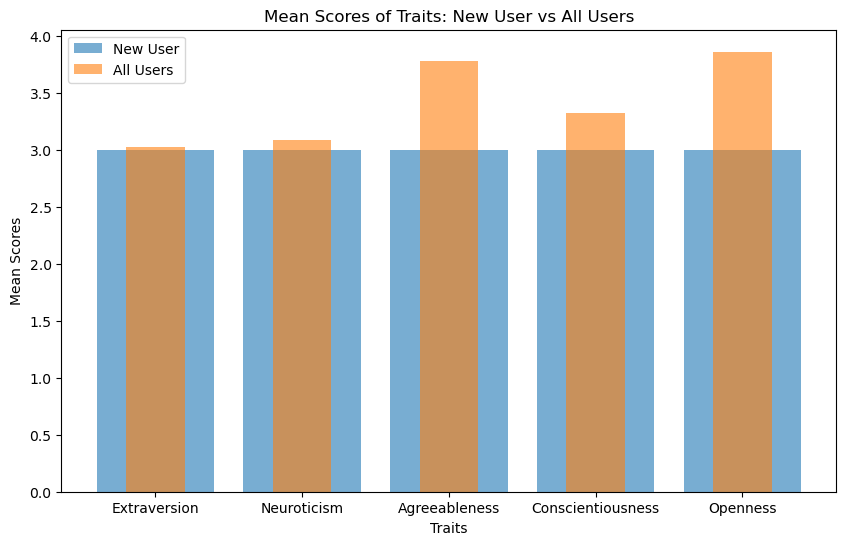

In [75]:
import matplotlib.pyplot as plt

# Calculate the mean scores for the new user
new_user_mean_scores = new_user_traits.mean()

# Calculate the mean scores for all users in the df DataFrame
all_users_mean_scores = df[['Extraversion', 'Neuroticism', 'Agreeableness', 'Conscientiousness', 'Openness']].mean()

# Plot the mean scores
plt.figure(figsize=(10, 6))
plt.bar(new_user_mean_scores.index, new_user_mean_scores, alpha=0.6, label='New User')
plt.bar(all_users_mean_scores.index, all_users_mean_scores, alpha=0.6, label='All Users', width=0.4)

plt.xlabel('Traits')
plt.ylabel('Mean Scores')
plt.title('Mean Scores of Traits: New User vs All Users')
plt.legend()
plt.show()